# Data Mining

In [482]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import kmedoids
import scipy.spatial.distance as spsd
from sklearn.metrics import silhouette_score
from rule_miner import RuleMiner
np.random.seed(2)
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Preparing the Dataset for Data Mining

In [483]:
pokemon_df = pd.read_csv('showdown.csv').loc[:, ['Pokemon 1','Pokemon 2','Pokemon 3','Pokemon 4','Pokemon 5','Pokemon 6']]
pokedex_df = pd.read_csv('pokemon_gen5_stats.csv')
pokedex_df

,Pokedex number,Name,HP,Attack,Special Attack,Defense,Special Defense,Speed,Stat total,Stat average
0,1,Bulbasaur,45,49,49,65,65,45,318,53.00
1,2,Ivysaur,60,62,63,80,80,60,405,67.50
2,3,Venusaur,80,82,83,100,100,80,525,87.50
3,4,Charmander,39,52,43,60,50,65,309,51.50
4,5,Charmeleon,58,64,58,80,65,80,405,67.50
...,...,...,...,...,...,...,...,...,...,...
665,647,Keldeo,91,72,90,129,90,108,580,96.67
666,647,Keldeo-Resolute,91,72,90,129,90,108,580,96.67
667,648,Meloetta,100,77,77,128,128,90,600,100.00
668,648,Meloetta-Pirouette,100,128,90,77,77,128,600,100.00


In [484]:
pokemon_df

,Pokemon 1,Pokemon 2,Pokemon 3,Pokemon 4,Pokemon 5,Pokemon 6
0,Infernape,Breloom,Tyranitar,Jellicent,Bronzong,Reuniclus
1,Tyranitar,Alakazam,Latios,Ferrothorn,Landorus-Therian,Excadrill
2,Tyranitar,Amoonguss,Starmie,Alakazam,Heatran,Skarmory
3,Tyranitar,Stoutland,Forretress,Salamence,Gliscor,Breloom
4,Tornadus,Politoed,Tentacruel,Dugtrio,Ferrothorn,Jirachi
...,...,...,...,...,...,...
1785,Politoed,Amoonguss,Excadrill,Thundurus-Therian,Keldeo,Ferrothorn
1786,Politoed,Gyarados,Jolteon,Ferrothorn,Haxorus,Umbreon
1787,Scizor,Togekiss,Hippowdon,Infernape,Terrakion,Sableye
1788,Tyranitar,Garchomp,Heatran,Conkeldurr,Forretress,Jellicent


In [485]:
baskets = []
for index, row in pokemon_df.iterrows():
    pkmn = row
    pkmn = [int(pokedex_df[pokedex_df['Name']==x].index[0]) for x in pkmn]
    baskets.append(pkmn)

for i, basket in enumerate(baskets):
    print('Basket', i, basket)

Basket 0 [394, 285, 247, 606, 442, 592]
Basket 1 [247, 64, 380, 611, 661, 542]
Basket 2 [247, 604, 120, 64, 495, 226]
Basket 3 [247, 520, 204, 372, 477, 285]
Basket 4 [654, 185, 72, 50, 611, 384]
Basket 5 [247, 486, 611, 661, 64, 379]
Basket 6 [93, 148, 64, 459, 226, 211]
Basket 7 [459, 112, 185, 72, 226, 384]
Basket 8 [226, 427, 592, 247, 379, 495]
Basket 9 [506, 450, 37, 120, 2, 93]
Basket 10 [455, 611, 606, 380, 450, 211]
Basket 11 [450, 495, 611, 606, 134, 211]
Basket 12 [606, 211, 120, 495, 37, 661]
Basket 13 [450, 148, 285, 120, 650, 211]
Basket 14 [455, 611, 606, 380, 450, 211]
Basket 15 [185, 384, 663, 657, 231, 665]
Basket 16 [285, 64, 450, 483, 211, 665]
Basket 17 [37, 349, 473, 584, 450, 476]
Basket 18 [442, 606, 592, 285, 247, 323]
Basket 19 [64, 450, 427, 226, 247, 93]
Basket 20 [247, 64, 285, 648, 661, 211]
Basket 21 [112, 201, 90, 450, 148, 231]
Basket 22 [64, 648, 661, 611, 604, 247]
Basket 23 [380, 372, 606, 611, 236, 477]
Basket 24 [285, 380, 652, 247, 665, 211]
Baske

In [486]:
bool_df = pd.DataFrame([[0 for _ in range(670)] for _ in range(1790)], columns=[i for i in range(670)])

for i, basket in enumerate(baskets):
    bool_df.iloc[i, basket] = 1

bool_df

,0,1,2,3,4,5,6,7,8,9,...,660,661,662,663,664,665,666,667,668,669
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1785,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1786,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1787,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1788,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Helper Function to revert Pokedex No. To Pokemon Name

In [487]:
def revert(list, key_df):
        return [key_df.loc[x,'Name'] for x in list]

## Association Rule Mining

In [488]:
# Choose a confidence level and support level. Can opt to use percentage of total instead.
rule_miner = RuleMiner(support_t=400,confidence_t=0.3)

In [489]:
all_frequent_itemsets = rule_miner.get_frequent_itemsets(bool_df)

for itemset in all_frequent_itemsets:
    print( revert(itemset, pokedex_df) )

['Politoed']
['Tyranitar']
['Latios']
['Garchomp']
['Ferrothorn']
['Landorus-Therian']


In [490]:
rules = rule_miner.get_association_rules(bool_df)
rules

[]

In [491]:
rules = rule_miner.get_association_rules(bool_df)

for rule in rules:
    print(f"{revert(rule[0], pokedex_df)} -> {revert(rule[1], pokedex_df)}")


In [492]:
unique_rules = set([(tuple(x[0]), tuple(x[1])) for x in rules])

for rule in unique_rules:
    print(f"{revert(rule[0], pokedex_df)} -> {revert(rule[1], pokedex_df)}")

## K-Medoids Clustering with Jaccard Distance

In [493]:
array_of_teams = bool_df.to_numpy()
k = 1000
distmatrix = spsd.squareform(spsd.pdist(array_of_teams, metric='jaccard'))
result = kmedoids.fasterpam(distmatrix, k)

In [494]:
cluster_index = 0
cluster = []

for index, elem in enumerate(result.labels):
    if elem == cluster_index:
        cluster.append(revert(baskets[index], pokedex_df))

print(f"Cluster {cluster_index}")
print(f"Medoid: {revert(baskets[result.medoids[cluster_index]], pokedex_df)}")
print(f"Cluster Size: {len(cluster)}")
print('-------------------------------------------------------')
for point in cluster:
    print(point)

Cluster 0
Medoid: ['Terrakion', 'Politoed', 'Jirachi', 'Tornadus', 'Keldeo-Resolute', 'Latios']
Cluster Size: 1
-------------------------------------------------------
['Terrakion', 'Politoed', 'Jirachi', 'Tornadus', 'Keldeo-Resolute', 'Latios']


In [495]:
print("Clusters and Cluster Sizes:")

cluster_sizes = []
for x in range(k):   
    cluster = []

    for index, elem in enumerate(result.labels):
        if elem == x:
            cluster.append(revert(baskets[index], pokedex_df))

    print(f"Cluster {x}: {revert(baskets[result.medoids[x]], pokedex_df)} {len(cluster)}")
    cluster_sizes.append(len(cluster))


Clusters and Cluster Sizes:
Cluster 0: ['Terrakion', 'Politoed', 'Jirachi', 'Tornadus', 'Keldeo-Resolute', 'Latios'] 1
Cluster 1: ['Tyranitar', 'Lucario', 'Latios', 'Ferrothorn', 'Gliscor', 'Mew'] 1
Cluster 2: ['Magnezone', 'Terrakion', 'Latios', 'Ferrothorn', 'Latias', 'Forretress'] 1
Cluster 3: ['Gyarados', 'Sableye', 'Magnezone', 'Jellicent', 'Skarmory', 'Excadrill'] 1
Cluster 4: ['Tyranitar', 'Gliscor', 'Excadrill', 'Milotic', 'Celebi', 'Magnezone'] 1
Cluster 5: ['Heatran', 'Forretress', 'Dragonite', 'Jellicent', 'Skarmory', 'Gastrodon'] 1
Cluster 6: ['Machamp', 'Jirachi', 'Alakazam', 'Tyranitar', 'Azelf', 'Skarmory'] 1
Cluster 7: ['Azelf', 'Volcarona', 'Jirachi', 'Breloom', 'Latios', 'Cloyster'] 1
Cluster 8: ['Skarmory', 'Jellicent', 'Landorus-Therian', 'Lucario', 'Tyranitar', 'Alakazam'] 3
Cluster 9: ['Feraligatr', 'Politoed', 'Keldeo', 'Garchomp', 'Celebi', 'Jirachi'] 1
Cluster 10: ['Tyranitar', 'Scizor', 'Mamoswine', 'Excadrill', 'Slowbro', 'Latios'] 1
Cluster 11: ['Salamence',

In [496]:

n_largest = 20
print(f"-- Top {n_largest} --")
n_largest_indices = sorted(range(len(cluster_sizes)), key=lambda x: cluster_sizes[x])[-n_largest:][::-1]

for x in n_largest_indices:   
    cluster = []

    for index, elem in enumerate(result.labels):
        if elem == x:
            cluster.append(revert(baskets[x], pokedex_df))

    print(f"Cluster {x}: {revert(baskets[x], pokedex_df)} {len(cluster)}")

-- Top 20 --
Cluster 964: ['Tyranitar', 'Mamoswine', 'Keldeo', 'Amoonguss', 'Gliscor', 'Excadrill'] 31
Cluster 666: ['Skarmory', 'Infernape', 'Tyranitar', 'Jellicent', 'Thundurus-Therian', 'Lucario'] 17
Cluster 970: ['Ninetales', 'Volcarona', 'Garchomp', 'Latios', 'Heatran', 'Xatu'] 13
Cluster 959: ['Blissey', 'Excadrill', 'Jellicent', 'Tyranitar', 'Landorus-Therian', 'Terrakion'] 13
Cluster 879: ['Tyranitar', 'Gliscor', 'Slowbro', 'Amoonguss', 'Terrakion', 'Excadrill'] 13
Cluster 819: ['Scizor', 'Tyranitar', 'Latios', 'Jellicent', 'Excadrill', 'Hydreigon'] 13
Cluster 659: ['Politoed', 'Thundurus-Therian', 'Keldeo', 'Ferrothorn', 'Tentacruel', 'Weavile'] 13
Cluster 997: ['Starmie', 'Latios', 'Jirachi', 'Garchomp', 'Dragonite', 'Magnezone'] 12
Cluster 583: ['Jirachi', 'Politoed', 'Mamoswine', 'Tentacruel', 'Salamence', 'Rotom-Wash'] 12
Cluster 761: ['Tyranitar', 'Landorus-Therian', 'Ferrothorn', 'Excadrill', 'Latios', 'Reuniclus'] 11
Cluster 868: ['Politoed', 'Ferrothorn', 'Alakazam', '

<Axes: >

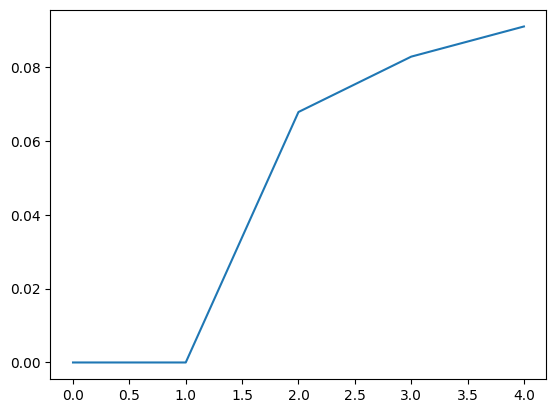

In [497]:
s_scores = [0, 0]
for i in range(3):
    c = kmedoids.fasterpam(distmatrix, i + 2)
    s_scores.append(silhouette_score(distmatrix, c.labels, metric='precomputed'))

pd.Series(s_scores).plot(kind='line')